___
# PROJETO 2

## Pedro de la Peña
___

In [554]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Desktop\Projeto 2


In [555]:
life = pd.read_excel('Life.xlsx', sep=',')

In [556]:
#limpando NA
life = life.dropna()

### Observação: uma pequena análise é feita após cada conjunto de gráficos ou medidas resumo e uma análise mais explicativa é feita após todos os gráficos de uma seção (definida por um número de 1 a 5)

___
## 1 - Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

#### Para selecionar três anos com formatos de distribuição diferentes, foram comparadas as médias e as medianas, por meio dos valores dados pelos comandos <i>.mean() e .median()<i/>.

##### É importante lembrar que:
##### -Uma média maior que a mediana, há uma assimetria à direita; 
##### -Uma média menor que a mediana gera assimetria à esquerda;
##### -Se a média for igual à mediana, haverá simetria.

### Assimetria à esquerda

In [557]:
df = pd.DataFrame()
df["2010"] = life.A2010
a2010_1=df["2010"].mean()
a2010_2=df["2010"].median()
print("Média de expectativa de vida de 2010:", a2010_1)
print("Mediana de expectativa de vida de 2010:", a2010_2)

Média de expectativa de vida de 2010: 70.80792039800998
Mediana de expectativa de vida de 2010: 73.4


### Assimetria à direita

In [558]:
df["1936"] = life.A1936
a1936_1=df["1936"].mean()
a1936_2=df["1936"].median()
print("Média de expectativa de vida de 1936:", a1936_1)
print("Mediana de expectativa de vida de 1936:", a1936_2)

Média de expectativa de vida de 1936: 39.597381615640785
Mediana de expectativa de vida de 1936: 35.7


### Simétrico (obs: a diferença entre a média e mediana é menor que 0.3 anos)

In [559]:
df["1870"] = life.A1870
a1870_1=df["1870"].mean()
a1870_2=df["1870"].median()
print("Média de expectativa de vida de 1870:", a1870_1)
print("Mediana de expectativa de vida de 1870:", a1870_2)

Média de expectativa de vida de 1870: 31.77398374774605
Mediana de expectativa de vida de 1870: 31.8


___
## 2 - Análise Descritiva

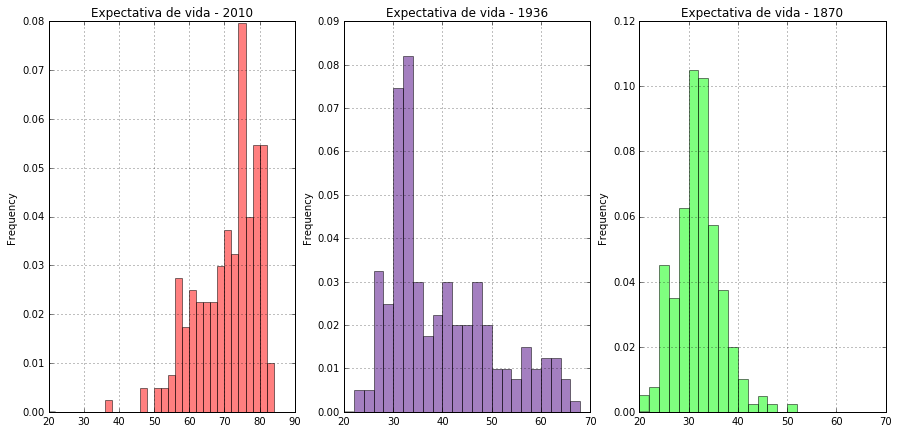

In [560]:
#Histogramas
fig = plt.figure(figsize=(15, 7))
plt.subplot(131)
df["2010"].plot(kind='hist', title= "Expectativa de vida - 2010", grid=True, bins = range(20,85,2),normed=1, alpha = 0.5,color ="red")
plt.subplot(132)
df["1936"].plot(kind='hist', title= "Expectativa de vida - 1936", grid=True,bins = range(20,71,2),normed=1, alpha = 0.5,color="indigo")
plt.subplot(133)
df["1870"].plot(kind='hist', title= "Expectativa de vida - 1870", grid=True,bins = range(20,71,2),normed=1, alpha = 0.5,color="lime")

In [561]:
df["2010"] = life.A2010
df["2010"].describe()

count    201.000000
mean      70.807920
std        8.697194
min       37.000000
25%       64.500000
50%       73.400000
75%       77.600000
max       83.000000
Name: 2010, dtype: float64

In [562]:
df["1936"] = life.A1936
df["1936"].describe()

count    201.000000
mean      39.597382
std       10.683892
min       23.000000
25%       31.400000
50%       35.700000
75%       46.832793
max       66.760000
Name: 1936, dtype: float64

In [563]:
df["1870"] = life.A1870
df["1870"].describe()

count    201.000000
mean      31.773984
std        4.665774
min       19.924000
25%       29.000000
50%       31.800000
75%       34.400000
max       50.860000
Name: 1870, dtype: float64

O aumento na expectativa de vida é claramente percebtível quando comparamos tanto o ano de 1870 quanto o de 1936 ao de 2010. Os 25% menores valores de 2010 correspondem à uma expectativa de vida de 64 anos, enquanto o valor mais aberrante de 1870 beira os 51 e do outro ano beira 67 anos.

1870 possuia baixo desvio padrão para a expectativa de vida da população, podendo ser atribuido, entre outros fatores, ao elevado índice de mortalidade infantil e o início da Segunda Revolução Industrial em meados do século XIX, fator este que diminuiu a qualidade de vida de grande parcela da população. Um baixo desvio padrão indica estabilidade na variável analisada.

O desvio padrão do ano de 1936 é o mais elevado, chegando a 10.68 anos. Isto significa que a expectativa de vida da população estava instável e isto pode ter sido causado por muitos motivos diferentes, como a ascensão de Hitler em 1933 e início do império nazista. 

Já o ano de 2010 possui desvio padrão para a expectativa de vida maior que de 1870 porém menor que a de 1936, visto que a maioria dos países já se desenvolveu ou está em desenvolvimento, contudo ainda há muitos países com alta mortalidade infantil, como a Angola, na África.

### QQ Plot

In [564]:
df["2010"] = sorted(df["2010"])
df["1936"] = sorted(df["1936"])
df["1870"] = sorted(df["1870"])

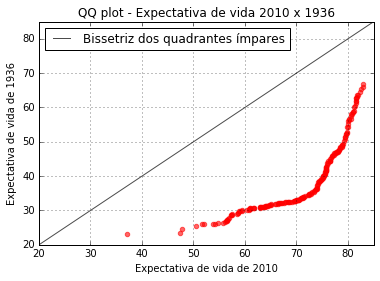

In [565]:
plt.scatter(df["2010"], df["1936"], alpha=0.6, label = '', color = 'red')
plt.plot([20, 85], [20, 85], label = 'Bissetriz dos quadrantes ímpares', color = 'black', alpha = 0.7)
plt.title('QQ plot - Expectativa de vida 2010 x 1936')
plt.xlim([20,85])
plt.ylim([20,85])
plt.grid()
plt.xlabel('Expectativa de vida de 2010')
plt.ylabel('Expectativa de vida de 1936')
plt.legend(loc = 'best')

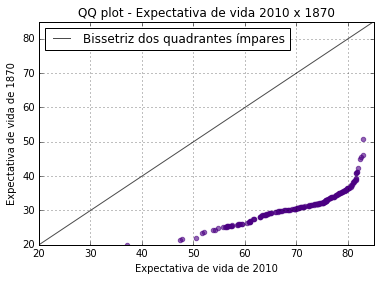

In [566]:
plt.scatter(df["2010"], df["1870"], alpha=0.6, label = '', color = 'indigo')
plt.plot([20, 85], [20, 85], label = 'Bissetriz dos quadrantes ímpares', color = 'black', alpha = 0.7)
plt.title('QQ plot - Expectativa de vida 2010 x 1870')
plt.xlim([20,85])
plt.ylim([20,85])
plt.grid()
plt.xlabel('Expectativa de vida de 2010')
plt.ylabel('Expectativa de vida de 1870')
plt.legend(loc = 'best')

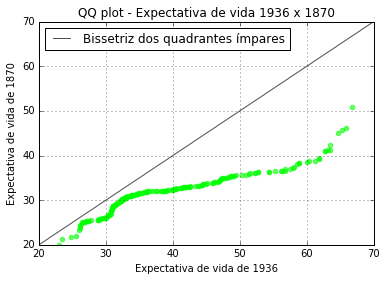

In [567]:
plt.scatter(df["1936"], df["1870"], alpha=0.6, label = '', color = 'lime')
plt.plot((20, 70), (20, 70), label = 'Bissetriz dos quadrantes ímpares', color = 'black', alpha = 0.7)
plt.title('QQ plot - Expectativa de vida 1936 x 1870')
plt.xlim([20,70])
plt.ylim([20,70])
plt.grid()
plt.xlabel('Expectativa de vida de 1936')
plt.ylabel('Expectativa de vida de 1870')
plt.legend(loc = 'best')

A partir da análise dos QQ plots, é possivel identificar que, a correlação é maior em dois anos que são mais próximos entre si, e os maiores valores de expecativa de vida estão localizados no ano mais recente quando comparados dois anos distintos.

## 3 - Aderência de um modelo probabilístico normal aos dados

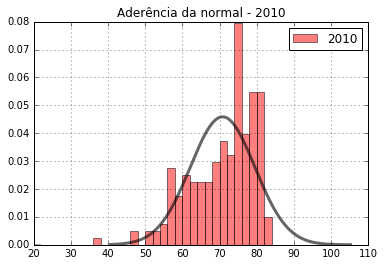

In [568]:
x = sorted(stats.norm.rvs(size = 10000, loc = 70.807920, scale = 8.697194))
plt.plot(x, stats.norm.pdf(x, loc = 70.807920, scale = 8.697194), lw = 3, alpha = 0.6, color = 'Black')
plt.title ('Aderência da normal - 2010')
df["2010"].hist(bins = range(20,85,2), color = "red", alpha = 0.5, normed = 1, label = '2010')
plt.legend(loc = 'best')

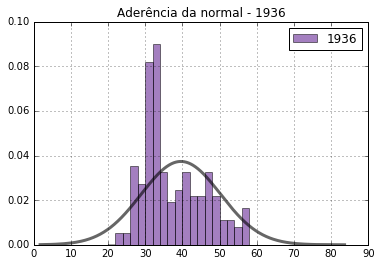

In [569]:
x = sorted(stats.norm.rvs(size = 10000, loc = 39.597382, scale = 10.683892))
plt.plot(x, stats.norm.pdf(x, loc = 39.597382, scale = 10.683892), lw = 3, alpha = 0.6, color = 'Black')
plt.title ('Aderência da normal - 1936')
df["1936"].hist(bins = range(20,60,2), color = "indigo", alpha = 0.5, normed = 1, label = '1936')
plt.legend(loc = 'best')

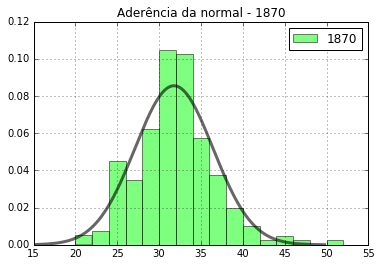

In [570]:
x = sorted(stats.norm.rvs(size = 10000, loc = 31.773984, scale = 4.665774))
plt.plot(x, stats.norm.pdf(x, loc = 31.773984, scale = 4.665774), lw = 3, alpha = 0.6, color = 'Black')
plt.title ('Aderência da normal - 1870')
df["1870"].hist(bins = range(20,55,2), color = "lime", alpha = 0.5, normed = 1, label = '1870')
plt.legend(loc = 'best')

O histograma de 1870 é o que parece melhor se adaptar à uma distribuição normal quando comparamos os outros dois anos à esta distribuição.

### Frequências Empíricas e Frequências da Normal

In [571]:
#Deixando em ordem crescente
df["2010"] = sorted(df["2010"])
df["1936"] = sorted(df["1936"])
df["1870"] = sorted(df["1870"])

freqrel = []
for i in range (201):
    freqrel.append((i-0.5)/201)

freqnorm2010 = []
for k in df["2010"]:
    freqnorm2010.append(stats.norm.cdf (k, loc = 70.807920, scale = 8.697194))

freqnorm1936 = []
for j in df["1936"]:
    freqnorm1936.append(stats.norm.cdf (j, loc = 39.597382, scale = 10.683892))

freqnorm1870 = []
for l in df["1870"]:
    freqnorm1870.append(stats.norm.cdf (l, loc = 31.773984, scale = 4.665774))

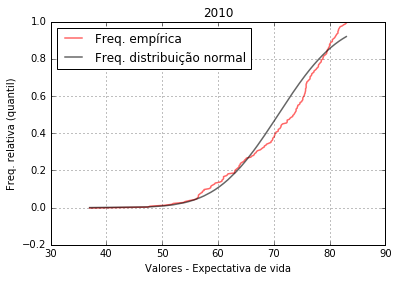

In [572]:
plt.plot(df["2010"], freqrel, lw = 1.5, color = 'red', alpha = 0.6, label = 'Freq. empírica')
plt.plot(df["2010"], freqnorm2010, lw = 1.5, color = 'Black', alpha = 0.6, label = 'Freq. distribuição normal')
plt.title('2010')
plt.grid()
plt.ylabel('Freq. relativa (quantil)')
plt.xlabel('Valores - Expectativa de vida')
plt.legend(loc = 'best')

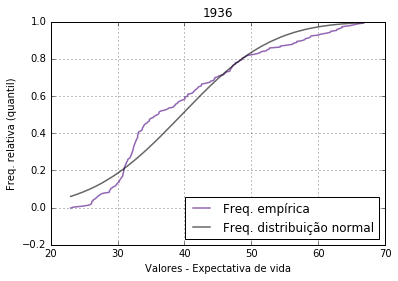

In [573]:
plt.plot(df["1936"], freqrel, lw = 1.5, color = 'indigo', alpha = 0.6, label = 'Freq. empírica')
plt.plot(df["1936"], freqnorm1936, lw = 1.5, color = 'Black', alpha = 0.6, label = 'Freq. distribuição normal')
plt.title('1936')
plt.grid()
plt.ylabel('Freq. relativa (quantil)')
plt.xlabel('Valores - Expectativa de vida')
plt.legend(loc = 'best')

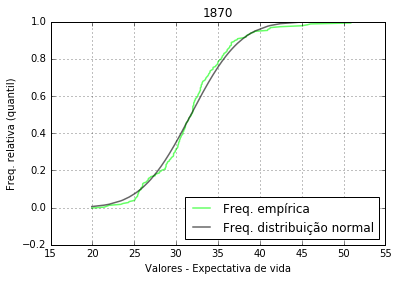

In [574]:
plt.plot(df["1870"], freqrel, lw = 1.5, color = 'lime', alpha = 0.6, label = 'Freq. empírica')
plt.plot(df["1870"], freqnorm1870, lw = 1.5, color = 'Black', alpha = 0.6, label = 'Freq. distribuição normal')
plt.title('1870')
plt.grid()
plt.ylabel('Freq. relativa (quantil)')
plt.xlabel('Valores - Expectativa de vida')
plt.legend(loc = 'best')

As frequências empíricas dos anos de 1936 e 2010 diferem muito mais da frequência da distribuição normal que as do ano de 1870.

### Quantis teóricos e amostrais

In [575]:
qt2010 = []
for i in freqrel:
    qt2010.append(stats.norm.ppf (i, loc = 70.807920, scale =  8.697194))

qt1936 = []
for i in freqrel:
    qt1936.append(stats.norm.ppf (i, loc = 39.597382, scale = 10.683892))

qt1870 = []
for i in freqrel:
    qt1870.append(stats.norm.ppf (i, loc = 31.773984, scale = 4.665774))

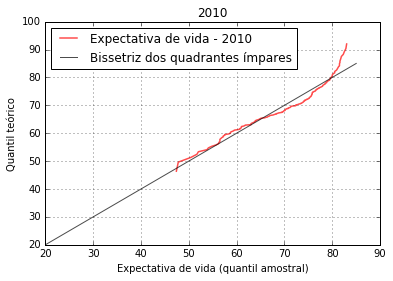

In [576]:
plt.plot(df["2010"], qt2010, lw = 1.5, color = 'red', alpha = 0.7, label = 'Expectativa de vida - 2010')
plt.plot([20, 85], [20, 85], label = 'Bissetriz dos quadrantes ímpares', color = 'black', alpha = 0.7)
plt.ylabel('Quantil teórico')
plt.xlabel('Expectativa de vida (quantil amostral)')
plt.title('2010')
plt.grid()
plt.legend(loc = 'best')

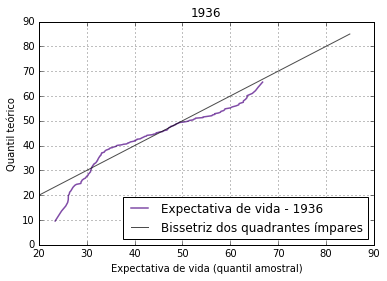

In [577]:
plt.plot(df["1936"], qt1936, lw = 1.5, color = 'indigo', alpha = 0.7, label = 'Expectativa de vida - 1936')
plt.plot([20, 85], [20, 85], label = 'Bissetriz dos quadrantes ímpares', color = 'black', alpha = 0.7)
plt.ylabel('Quantil teórico')
plt.xlabel('Expectativa de vida (quantil amostral)')
plt.title('1936')
plt.grid()
plt.legend(loc = 'best')

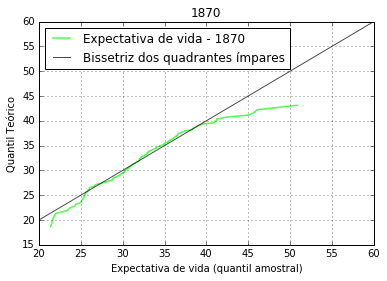

In [578]:
plt.plot(df["1870"], qt1870, lw = 1.5, color = 'lime', alpha = 0.7, label = 'Expectativa de vida - 1870')
plt.plot([20, 60], [20, 60], label = 'Bissetriz dos quadrantes ímpares', color = 'black', alpha = 0.7)
plt.xlabel('Expectativa de vida (quantil amostral)')
plt.ylabel('Quantil Teórico')
plt.title('1870')
plt.grid()
plt.legend(loc = 'best')

Os quantis teóricos dispostos no eito Y representam o número <i>i</i> amostra, supondo que a distribuição fosse descrita por uma normal. No eixo X estão os quantis amostrais, ou seja, os valores correspondentes à cada amostra. 

Logo, quanto mais próximos os valores de Y forem de X, ou seja, mais próximos da bissetriz dos quadrantes ímpares, melhor a amostra pode ser descrita por uma distribuição normal.


Os valores do ano de 2010 conseguem se adaptar bem aos requisitos apresentados acima, porém,das variáveis escolhidas, a que melhor se adequa tanto à construção do histograma com a função de densidade de probabilidade quanto a relação da frequencia acumulada empirica x relativa e o quantil teórico x amostral é a variável do ano de 1870. Logo, pode-se afirmar que o modelo de distribuição normal é o mais adequado para esta variável.

___
## 4 - Aderência de um modelo probabilístico assimétrico aos dados

#### Visto que a distribuição de valores de 1870 se encaixaram bem no modelo de distribuição normal, tal ano não será retomado nesta parte da análise.

In [579]:
beta2k10 = s.beta.fit(df["2010"])
print(beta2k10)

(5.1724128282813142, 1.3701071908769853, 24.541264948878279, 58.529742668868195)


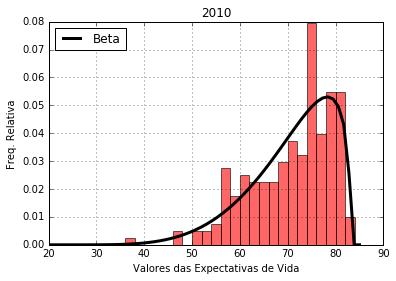

In [580]:
lin = np.linspace(20,85,60)
bp = s.beta.pdf(lin,5.1724128282813142, 1.3701071908769853, 24.541264948878279, 58.529742668868195)
df["2010"].hist(normed=True, color="red", bins=range(20,85,2),alpha = 0.6)
plt.plot(lin, bp, '-', color='black',lw=3, label="Beta")
plt.xlabel("Valores das Expectativas de Vida")
plt.ylabel("Freq. Relativa")
plt.title("2010")
plt.legend(loc = 'best')

In [581]:
expon1936 = s.gamma.fit(df["1936"])
print(expon1936)

(2.599171002958129, 22.196356032338194, 6.6948538474920944)


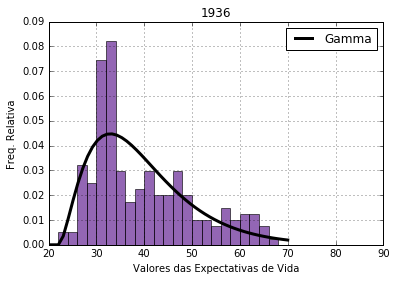

In [582]:
lin = np.linspace(20,70,50)
bp = s.gamma.pdf(lin,2.5991710029579442, 22.196356032337938, 6.6948538474921158)
df["1936"].hist(normed=True, color="indigo", bins=range(20,85,2),alpha = 0.6)
plt.plot(lin, bp, '-', color='black',lw=3, label="Gamma")
plt.xlabel("Valores das Expectativas de Vida")
plt.ylabel("Freq. Relativa")
plt.title("1936")
plt.legend(loc = 'best')

Visualmente, a distribuição da variável do ano de 2010 se encaixa muito bem em uma distribuição beta, enquanto a distribuição da variável do ano de 1936 não parece seguir muito bem um modelo de distribuição Gamma. Contudo, entre as distribuições de Weibull, Exponencial, Log-Normal e Gamma, a última foi a que a variável mais se aproximou.

### Frequências Empíricas e Frequências das respectivas distribuições

In [583]:
df["2010"] = sorted(df["2010"])
df["1936"] = sorted(df["1936"])

freqrel = []
for i in range (201):
    freqrel.append((i-0.5)/201)

freqbeta2010 = []
for k in df["2010"]:
    freqbeta2010.append(stats.beta.cdf(k, 5.1724128282813142, 1.3701071908769853, 24.541264948878279, 58.529742668868195))

freqgamma1936 = []
for j in df["1936"]:
    freqgamma1936.append(stats.gamma.cdf(j, 2.5991710029579442, 22.196356032337938, 6.6948538474921158))

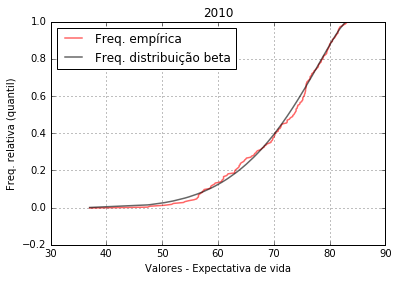

In [584]:
plt.plot(df["2010"], freqrel, lw = 1.5, color = 'red', alpha = 0.6, label = 'Freq. empírica')
plt.plot(df["2010"], freqbeta2010, lw = 1.5, color = 'Black', alpha = 0.6, label = 'Freq. distribuição beta')
plt.title('2010')
plt.grid()
plt.ylabel('Freq. relativa (quantil)')
plt.xlabel('Valores - Expectativa de vida')
plt.legend(loc = 'best')

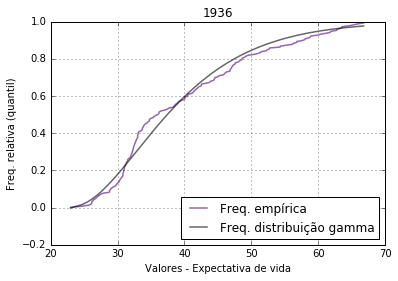

In [585]:
plt.plot(df["1936"], freqrel, lw = 1.5, color = 'indigo', alpha = 0.6, label = 'Freq. empírica')
plt.plot(df["1936"], freqgamma1936, lw = 1.5, color = 'Black', alpha = 0.6, label = 'Freq. distribuição gamma')
plt.title('1936')
plt.grid()
plt.ylabel('Freq. relativa (quantil)')
plt.xlabel('Valores - Expectativa de vida')
plt.legend(loc = 'best')

Observando os resultados obtidos quando os anos de 2010 e 1936 foram comparados com a frequência de uma distribuição normal, é possivel observar que os valores dos dois anos se adaptaram de forma melhor às novas distribuições. Contudo, o ano que melhor se adaptou à nova frequência foi o de 2010.

### Quantis teóricos e amostrais

In [586]:
qtbeta2010 = []
for i in freqrel:
    qtbeta2010.append(stats.beta.ppf (i, 5.1724128282813142, 1.3701071908769853, 24.541264948878279, 58.529742668868195))

qtgamma1936 = []
for i in freqrel:
    qtgamma1936.append(stats.gamma.ppf (i, 2.5991710029579442, 22.196356032337938, 6.6948538474921158))


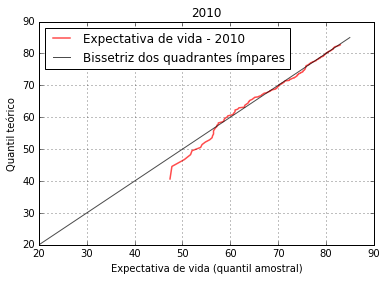

In [587]:
plt.plot(df["2010"], qtbeta2010, lw = 1.5, color = 'red', alpha = 0.7, label = 'Expectativa de vida - 2010')
plt.plot([20, 85], [20, 85], label = 'Bissetriz dos quadrantes ímpares', color = 'black', alpha = 0.7)
plt.ylabel('Quantil teórico')
plt.xlabel('Expectativa de vida (quantil amostral)')
plt.title('2010')
plt.grid()
plt.legend(loc = 'best')

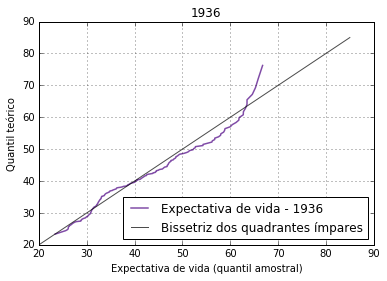

In [588]:
plt.plot(df["1936"], qtgamma1936, lw = 1.5, color = 'indigo', alpha = 0.7, label = 'Expectativa de vida - 1936')
plt.plot([20, 85], [20, 85], label = 'Bissetriz dos quadrantes ímpares', color = 'black', alpha = 0.7)
plt.ylabel('Quantil teórico')
plt.xlabel('Expectativa de vida (quantil amostral)')
plt.title('1936')
plt.grid()
plt.legend(loc = 'best')

A correlação entre os quantil teórico (beta) e amostral do ano de 2010 é muito elevada a partir dos valores de aproximadamente 57 anos, enquanto a correlação do quantil teórico (gamma) e amostral de 1936 é menor que a de 2010, contudo ainda aparenta ser consideravelmente elevada.

A partir da análise de todos os gráficos obtidos no item 4, é possivel afirmar que a distribuição que melhor aderiu à um modelo probabilístico assimétrico foi a do ano de 2010, que aparenta ter o comportamento quase exato de uma distribuição beta ideal. Já para o ano de 1936, os valores se aproximaram muito mais da distribuição gamma que qualquer outra.

___
## 5 - Cálculo de probabilidades a partir da distribuição normal

In [589]:
sup70_2010 =(1 - stats.norm.cdf(70, loc = 70.807920, scale =  8.697194))*100
sup70_1936 =(1 - stats.norm.cdf(70, loc = 39.597382, scale = 10.683892))*100
sup70_1870 =(1 - stats.norm.cdf(70, loc = 31.773984, scale = 4.665774))*100

In [590]:
print('Probabilidade do país ter expectativa de vida maior que 70 anos em 2010:', sup70_2010, '%')
print("")
print('Probabilidade do país ter expectativa de vida maior que 70 anos em 1913:', sup70_1936, '%')
print("")
print('Probabilidade do país ter expectativa de vida maior que 70 anos em 1870:', sup70_1870, '%')

Probabilidade do país ter expectativa de vida maior que 70 anos em 2010: 53.7006244428 %

Probabilidade do país ter expectativa de vida maior que 70 anos em 1913: 0.221604350864 %

Probabilidade do país ter expectativa de vida maior que 70 anos em 1870: 1.11022302463e-14 %


Com estes valores, é possivel observar que a expectativa de vida tem melhorado muito ao longo dos anos. Em 1870, de acordo com os dados, era quase impossível de alguem conseguir viver mais que 70 anos, enquanto em 2010, a probabilidade de atingir esta marca é de quase 54%.

In [591]:
inf75_2010 =((stats.norm.cdf(75, loc = 70.807920, scale = 8.697194) - stats.norm.cdf(70, loc = 70.807920, scale = 8.697194))/(stats.norm.cdf(83, loc = 70.807920, scale = 8.697194) - stats.norm.cdf(70, loc = 70.807920, scale = 8.697194)))*100
inf75_1936 =((stats.norm.cdf(75, loc = 39.597382, scale = 10.683892) - stats.norm.cdf(70, loc = 39.597382, scale = 10.683892))/(stats.norm.cdf(58.95, loc = 39.597382, scale = 10.683892) - stats.norm.cdf(70, loc = 39.597382, scale = 10.683892)))*100
inf75_1870 =((stats.norm.cdf(75, loc = 31.773984, scale = 4.665774) - stats.norm.cdf(70, loc = 31.773984, scale = 4.665774))/(stats.norm.cdf(50.86, loc = 31.773984, scale = 4.665774) - stats.norm.cdf(70, loc = 31.773984, scale = 4.665774)))*100

In [592]:
print('Prob. do país ter expectativa de vida menor que 75 anos, sendo que a espctativa é maior que 70 anos, em 2010:', inf75_2010, '%')
print("")
print('Prob. do país ter expectativa de vida menor que 75 anos, sendo que a espctativa é maior que 70 anos, em 1913:', inf75_1936, '%')
print("")
print('Prob. do país ter expectativa de vida menor que 75 anos, sendo que a espctativa é maior que 70 anos, em 1870:', inf75_1870, '%')

Prob. do país ter expectativa de vida menor que 75 anos, sendo que a espctativa é maior que 70 anos, em 2010: 48.6511546152 %

Prob. do país ter expectativa de vida menor que 75 anos, sendo que a espctativa é maior que 70 anos, em 1913: -5.3484026144 %

Prob. do país ter expectativa de vida menor que 75 anos, sendo que a espctativa é maior que 70 anos, em 1870: -5.16168202818e-10 %


Os valores negativos indicam a impossibilidade de alcançar a marca desejada. Logo, apenas o ano de 2010 apresenta a possibilidade desta, que beira os 50%.

In [593]:
print('Maior expectativa de vida dos 10% com menor expectativa de 2010:', stats.norm.ppf(0.10, loc = 70.807920, scale = 8.697194), "anos")
print("")
print('Maior expectativa de vida dos 10% com menor expectativa de 1936:', stats.norm.ppf(0.10, loc = 39.597382, scale = 10.683892), "anos")
print("")
print('Maior expectativa de vida dos 10% com menor expectativa de 1870:', stats.norm.ppf(0.10, loc = 31.773984, scale = 4.665774), "anos")

Maior expectativa de vida dos 10% com menor expectativa de 2010: 59.6620174135 anos

Maior expectativa de vida dos 10% com menor expectativa de 1936: 25.9054234813 anos

Maior expectativa de vida dos 10% com menor expectativa de 1870: 25.7945540258 anos


A maior expectativa de vida dos 10% com menores valores de expectativa de vida no ano de 2010 é, surpreendentemente, maior que a soma dos maiores valores obtidos nos outros dois anos.

In [594]:
print('Menor expectativa de vida dos 10% com maior expectativa de 2010:', stats.norm.ppf(0.90, loc = 70.807920, scale = 8.697194), "anos")
print("")
print('Menor expectativa de vida dos 10% com maior expectativa de 1936:', stats.norm.ppf(0.90, loc = 39.597382, scale = 10.683892), "anos")
print("")
print('Menor expectativa de vida dos 10% com maior expectativa de 1870:', stats.norm.ppf(0.90, loc = 31.773984, scale = 4.665774), "anos")

Menor expectativa de vida dos 10% com maior expectativa de 2010: 81.9538225865 anos

Menor expectativa de vida dos 10% com maior expectativa de 1936: 53.2893405187 anos

Menor expectativa de vida dos 10% com maior expectativa de 1870: 37.7534139742 anos
